**third session**  


 Alzahra university
 winter 2023


**Fahimeh Golshani**

# install a library or change its version
 you can use the pip command, which is the package installer for Python.

In [ ]:
pip install keras==2.12.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/post-processingTatanic.csv')

In [ ]:
data.shape

(891, 13)

# Modeling

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier




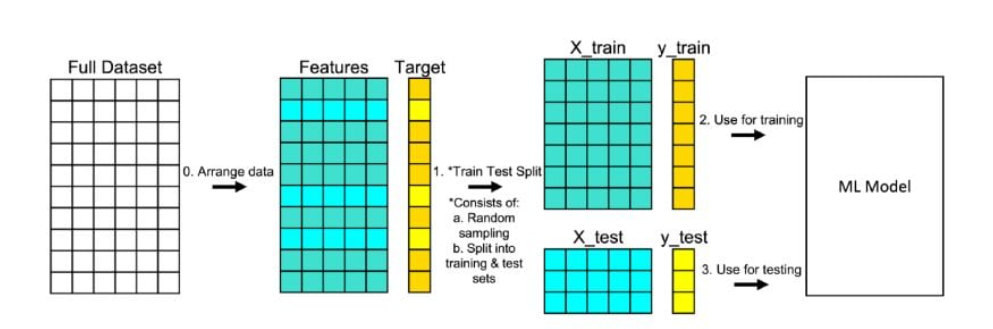

**Train/Test split:**

 prepares the data for training and evaluating a machine learning model by splitting it into features and target variables and then further dividing it into training and testing sets.

**test_size=0.20:**
 Specifies that 20% of the data should be reserved for testing, and the remaining 80% will be used for training.
**random_state=101:**
Sets a random seed for reproducibility. This ensures that the same split is obtained every time the code is run.
**X_train, X_test, y_train, y_test:**
 These variables store the resulting training and testing sets. X_train contains the feature values for the training set, X_test contains the feature values for the testing set, y_train contains the target values for the training set, and y_test contains the target values for the testing set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1),data['Survived'], test_size=0.20, random_state=101, shuffle=True)



# Feature Scaling:

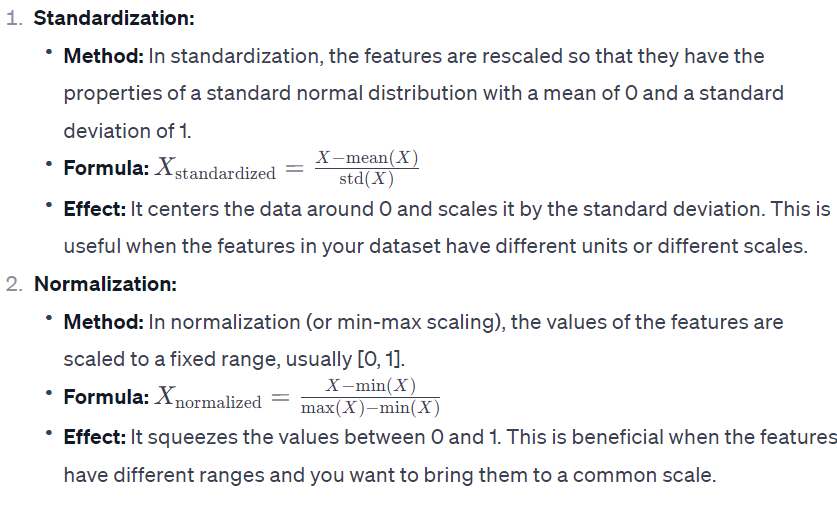



For artificial neural networks (ANNs), standardization is often preferred over normalization. This is because neural networks, especially those trained using gradient-based optimization algorithms, tend to perform better when the input features are on a similar scale.

In [ ]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


ANN Structure

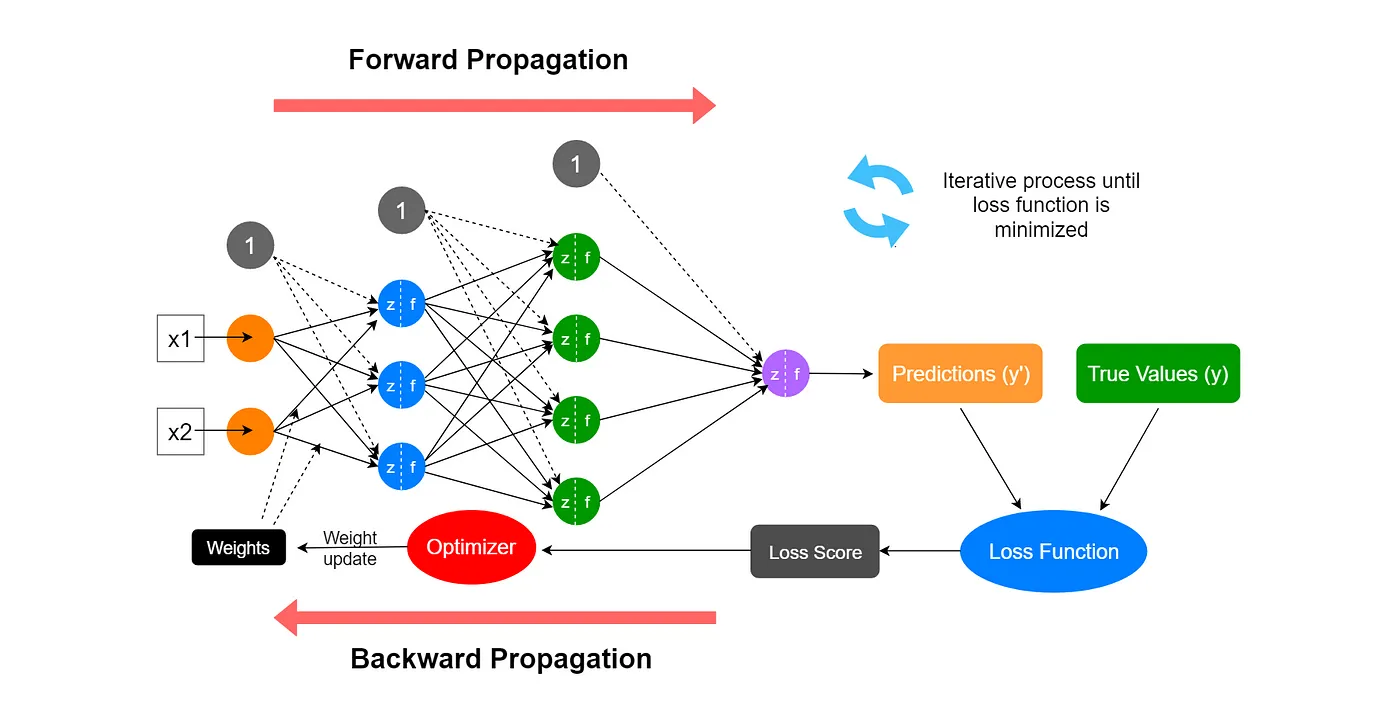

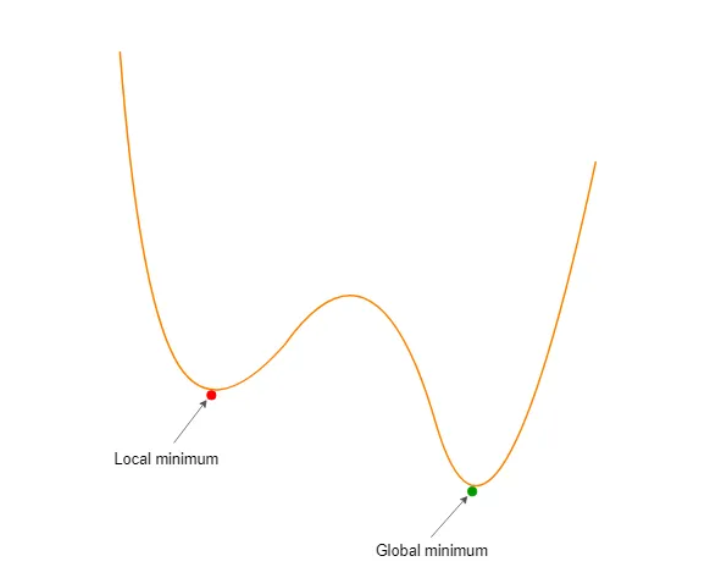

refrence: https://medium.com/data-science-365/overview-of-a-neural-networks-learning-process-61690a502fa

**Sequential Model:**
The Sequential model in Keras is a linear stack of layers, where you can simply add one layer at a time. It's a straightforward way to create neural networks for most use cases.

**First Dense Layer:**

Dense represents a fully connected layer in the neural network.
32 is the number of neurons (units) in this layer.
input_dim=12 specifies the number of input features for the first layer. This is required only for the first layer, and subsequent layers automatically infer the input shape from the previous layer.
activation='relu' sets the activation function for the layer to the Rectified Linear Unit (ReLU), which is a common choice for hidden layers.

**Second Dense Layer:**

Another fully connected layer with 8 neurons and ReLU activation. This layer is added on top of the previous layer.

**Output Layer:**

The final layer with 1 neuron and a sigmoid activation function.
For binary classification problems, a single neuron with sigmoid activation is commonly used. It produces output in the range [0, 1], representing the probability of the positive class.
For multi-class classification, the number of neurons in the output layer would be equal to the number of classes, and the activation function might be softmax.

In [ ]:
# define the keras model

model = Sequential()
#First Dense Layer
model.add(Dense(32, input_dim=12, activation='relu'))
#Second Dense Layer
model.add(Dense(8, activation='relu'))
#Output Layer:
model.add(Dense(1, activation='sigmoid'))

compile this model using a specific optimizer, loss function, and metrics before training it on your data.

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 689
Trainable params: 689
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from keras.utils import plot_model


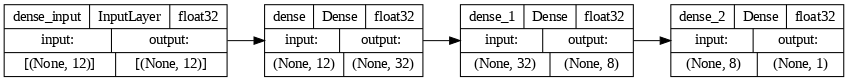

In [ ]:
plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='LR',  # Set direction to left-to-right
    expand_nested=True,
    dpi=75
)

train the model using the fit method:
Here, X_train, y_train are your training data. Adjust the hyperparameters and other configurations based on your specific task and dataset.

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,  # times model will run through the data
                    verbose=True,
                    validation_split=0.1,
                    #class_weight=class_weights,
                    batch_size=32)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/100
20/20 [==============================] - 1s 15ms/step - loss: 0.8174 - accuracy: 0.5750 - val_loss: 0.6824 - val_accuracy: 0.6667
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6986 - accuracy: 0.6078 - val_loss: 0.5844 - val_accuracy: 0.6806
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6195 - accuracy: 0.6516 - val_loss: 0.5187 - val_accuracy: 0.7222
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5663 - accuracy: 0.6844 - val_loss: 0.4619 - val_accuracy: 0.8194
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5216 - accuracy: 0.7563 - val_loss: 0.4217 - val_accuracy: 0.8472
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4893 - accuracy: 0.7859 - val_loss: 0.3952 - val_accuracy: 0.8611
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4690 - accuracy: 0.7937 - val_loss: 0.3859 - val_accuracy: 0.8611
Epoch 8/100


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

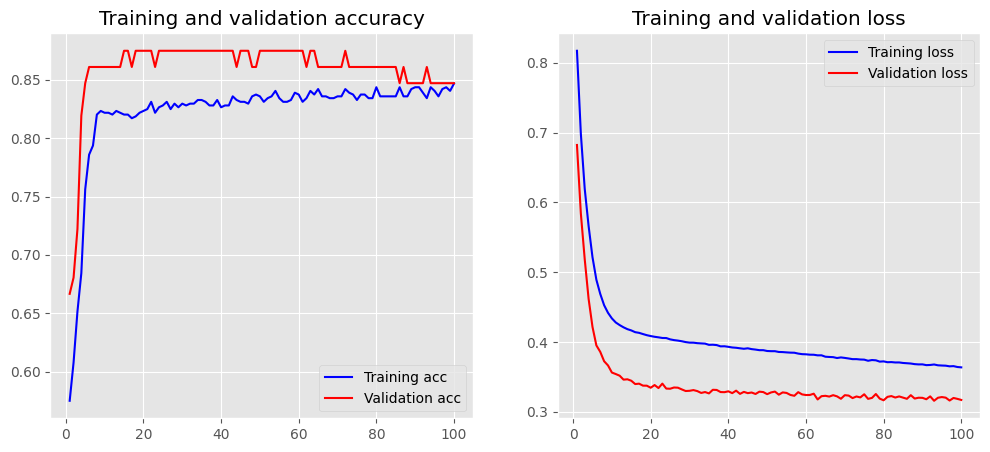

In [ ]:
plot_history(history)

# Evaluation
We can check precision,recall,f1-score using classification report!

Evaluating model with unseen data:

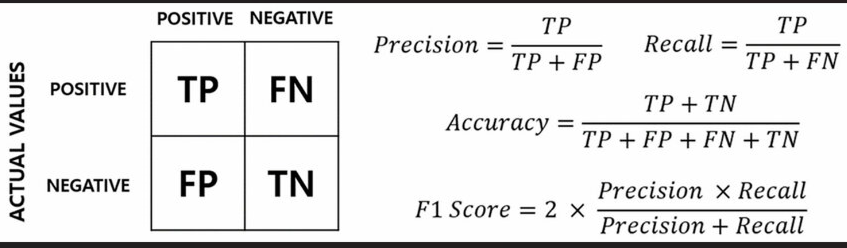

In [ ]:
predicted_probabilities = model.predict(X_test)

# Convert probabilities to class labels
predicted_classes = (predicted_probabilities > 0.5).astype('int32')

6/6 [==============================] - 0s 2ms/step


In [ ]:
classes = ['Dead','Survive']

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(y_test, predicted_classes ,target_names=classes))

              precision    recall  f1-score   support

        Dead       0.78      0.94      0.85        99
     Survive       0.90      0.66      0.76        80

    accuracy                           0.82       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.82      0.81       179

